In [4]:
%load_ext autoreload
%matplotlib inline 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
%autoreload

import struct
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from IPython.display import HTML

from scanm_smp import SMP
from scanm_global import *

In [6]:
scmf = SMP()
_ = scmf.loadSMH("M1_LR_GCL4_chirp", verbose=False)

Processing file `M1_LR_GCL4_chirp.smh`
Loading pre-header ...
Loading parameters (key-value pairs) ...
71 key-value pair(s) found
Correct parameters for older files ...
68 parameter(s) extracted
Done.


In [7]:
_ = scmf.loadSMP()

Processing file `M1_LR_GCL4_chirp.smp`
Loading post-header ...
3 AI channel(s) (0b111)
2224 of 1500 buffer(s) (each 2560 pixels) per channel
2224 pixel bufs of 2224 read.
Done.


In [8]:
scmf.summary()

Summary
-------
Scan    : mode, type   : XYImage (0), 10
Pixel   : size         : 2 bytes/pixel
          duration     : 25.0 us (25.0)
Frame   : x-y size     : 80 x 64 pixels
          x-offset     : 6 pixels
          x-retrace    : 10 pixels
          count        : 1112 recorded
          organisation : 2 pixel buffers/frame
Stimulus: # of buffers : 3
          mask         : 0111
Input   : # of channels: 3
          mask         : 0111
Zoom factor            : 0.87


In [16]:
scmf.

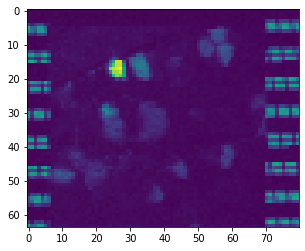

In [8]:
fr = scmf.getData(ch=0, crop=False)[0]

plt.imshow(fr, interpolation='nearest')
plt.show()

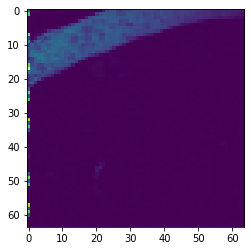

In [15]:
fr = scmf.getData(ch=1, crop=True)[30]

plt.imshow(fr, interpolation='nearest')
plt.show()

In [10]:
video = scmf.getData(ch=0, crop=True)

fig = plt.figure()
im = plt.imshow(video[0,:,:])

plt.close() # this is required to not display the generated image

def init():
    im.set_data(video[0,:,:])

def animate(i):
    im.set_data(video[i,:,:])
    return im

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=video.shape[0],
                               interval=50)
HTML(anim.to_html5_video())